__<div align='center'><font size='10'>BOSON FACS</font></div>__

In [1]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
# import statsmodels.api as sm
import csv
import pycircos
from scipy.stats import poisson
import itertools
import collections
import seaborn as sns

import FACSus as fs

sns.set(style="whitegrid")
%cd ..

/Users/sus_zhang/Desktop/Boson FACS


In [2]:
def get_phe(col, df, save_name, plot = False, save = False, save_path = None):
    tmp = fs.sanity_check_filter4(df, col, plot = plot, save = save, save_path = save_path)
    fs.get_phenotype(tmp, col, save_name)

In [3]:
df1 = pd.read_csv('facs/Baseline/Panel1_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df2 = pd.read_csv('facs/Baseline/Panel2_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df3 = pd.read_csv('facs/Baseline/Panel3_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df4 = pd.read_csv('facs/Baseline/Panel4_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df5 = pd.read_csv('facs/Baseline/Panel5_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df1.iloc[:,1:-9] = df1.iloc[:,1:-9].apply(pd.to_numeric)
df1 = df1.drop(columns = ['Azim data.SUBJID'])
df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_numeric)
df3.iloc[:, 1:] = df3.iloc[:, 1:].apply(pd.to_numeric)
df4.iloc[:, 1:] = df4.iloc[:, 1:].apply(pd.to_numeric)
df5.iloc[:, 1:] = df5.iloc[:, 1:].apply(pd.to_numeric)

dfs = [df1, df2, df3, df4, df5]
new_dfs = [df1.copy(), df2.copy(), df3.copy(), df4.copy(), df5.copy()]
for i in range(5):
    new_columns = [dfs[i].columns[0]] + [col + '_panel' + str(i+1) for col in dfs[i].columns[1:]]
    new_dfs[i].columns = new_columns
tmp = pd.merge(new_dfs[0], new_dfs[1], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[2], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[3], on = 'Patient ID')
df = pd.merge(tmp, new_dfs[4], on = 'Patient ID')
df = df.dropna()
# df['Patient ID'] = 'BOSON' + df['Patient ID']

In [4]:
# df3 = fs.sanity_check_filter(df3, ['CD4+ TEMRA CD27- CD127+', 'CD4+ TEMRA CD27+ CD127+', 'CD4+ TEMRA CD27+ CD127-', 'CD4+ TEMRA CD27- CD127-'], 
#                           'CD4 TEMRA CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ TEM CD27- CD127+', 'CD4+ TEM CD27+ CD127+', 'CD4+ TEM CD27+ CD127-', 'CD4+ TEM CD27- CD127-'],
#                          'CD4 TEM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ TCM CD27- CD127+', 'CD4+ TCM CD27+ CD127+', 'CD4+ TCM CD27+ CD127-', 'CD4+ TCM CD27- CD127-'],
#                          'CD4 TCM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ Naïve CD27- CD127+', 'CD4+ Naïve CD27+ CD127+', 'CD4+ Naïve CD27+ CD127-', 'CD4+ Naïve CD27- CD127-'],
#                          'CD4 Naïve CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TEMRA CD27- CD127+', 'CD8+ TEMRA CD27+ CD127+', 'CD8+ TEMRA CD27+ CD127-', 'CD8+ TEMRA CD27- CD127-'],
#                          'CD8 TEMRA CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TEM CD27- CD127+', 'CD8+ TEM CD27+ CD127+', 'CD8+ TEM CD27+ CD127-', 'CD8+ TEM CD27- CD127-'],
#                          'CD8 TEM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TCM CD27- CD127+', 'CD8+ TCM CD27+ CD127+', 'CD8+ TCM CD27+ CD127-', 'CD8+ TCM CD27- CD127-'],
#                          'CD8 TCM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ Naïve CD27- CD127+', 'CD8+ Naïve CD27+ CD127+', 'CD8+ Naïve CD27+ CD127-', 'CD8+ Naïve CD27- CD127-'],
#                          'CD8 Naïve CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ Naïve CCR7+ CD45RA+', 'CD4+ TEMRA CCR7- CD45RA+', 'CD4+ TCM CCR7+ CD45RA-', 'CD4+ TEM CCR7- CD45RA-'],
#                          'CD4 CCR7 CD45RA')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ Naïve CCR7+ CD45RA+', 'CD8+ TEMRA CCR7- CD45RA+', 'CD8+ TCM CCR7+ CD45RA-', 'CD8+ TEM CCR7- CD45RA-'],
#                          'CD8 CCR7 CD45RA')
# df = sanity_check_filter2(df, ['Lymphocytes_panel' + str(i+1) for i in range(5)], 'Lymphocytes')
# df = sanity_check_filter2(df, ['Total live_panel' + str(i+1) for i in range(5)], 'Lymphocytes')
# df = sanity_check_filter2(df, ['Live_panel' + str(i+1) for i in range(5)], 'Lymphocytes')

/Users/sus_zhang/Desktop/Boson FACS/scripts/FACSus.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newname] = df[cols].mean(axis=1)


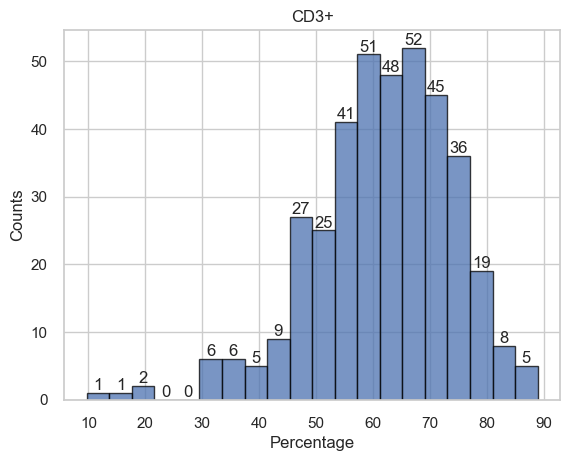

/Users/sus_zhang/Desktop/Boson FACS/scripts/FACSus.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newname] = df[cols].mean(axis=1)


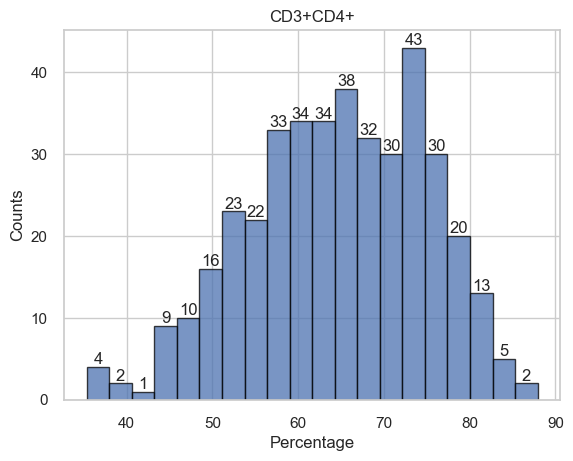

/Users/sus_zhang/Desktop/Boson FACS/scripts/FACSus.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newname] = df[cols].mean(axis=1)


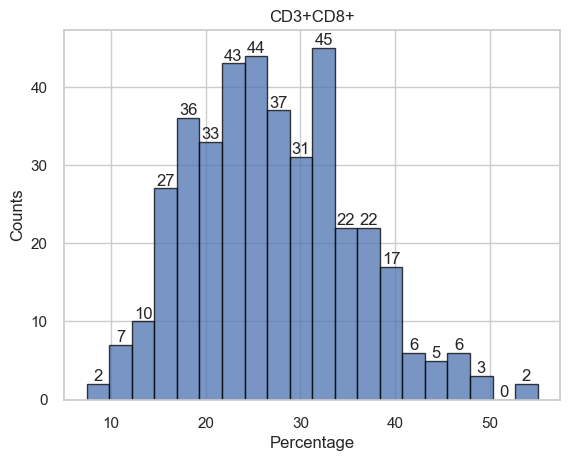

/Users/sus_zhang/Desktop/Boson FACS/scripts/FACSus.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newname] = (df[colname + '_panel1'] + df[colname + '_panel2'])/2


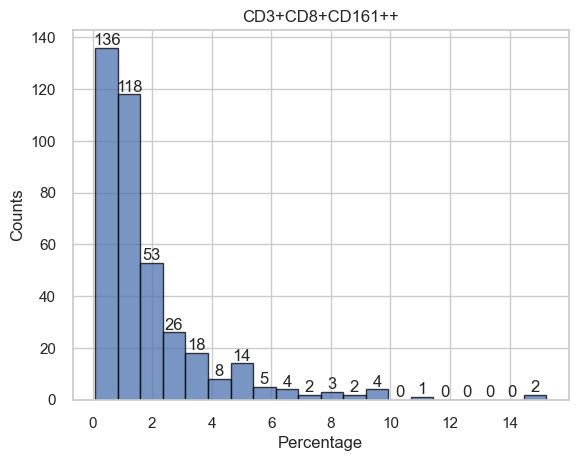

/Users/sus_zhang/Desktop/Boson FACS/scripts/FACSus.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newname] = (df[colname + '_panel1'] + df[colname + '_panel2'])/2


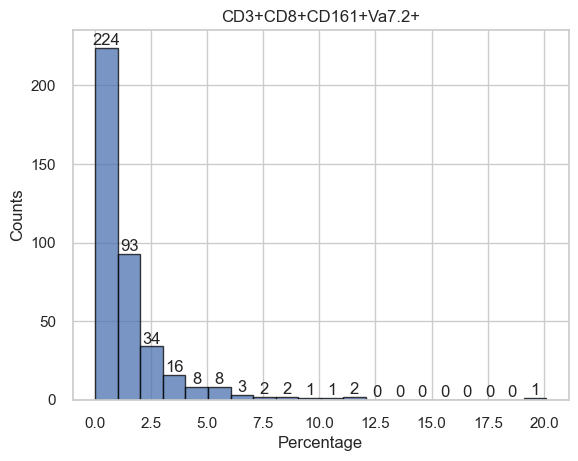

In [4]:
CD3 = fs.sanity_check_filter(df, ['CD3+_panel1', 'CD3-_panel1'], 'CD3')
CD3 = fs.sanity_check_filter2(CD3, ['CD3+_panel' + str(i+1) for i in range(5)], 'CD3+')
get_phe('CD3+', CD3, 'CD3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+/CD3+_hist")
CD4 = fs.sanity_check_filter2(df, ['CD3+/CD3+CD4+_panel' + str(i+1) for i in range(5)], 'CD3+CD4+')
get_phe('CD3+CD4+', CD4, 'CD3+CD4+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+/CD3+CD4+_hist")
CD8 = fs.sanity_check_filter2(df, ['CD3+/CD3+CD8+_panel' + str(i+1) for i in range(5)], 'CD3+CD8+')
get_phe('CD3+CD8+', CD8, 'CD3+CD8+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+/CD3+CD8+_hist")
CD161 = fs.sanity_check_filter3(df, 'CD3+/CD3+CD8+/CD8+CD161++', 'CD3+CD8+CD161++')
get_phe('CD3+CD8+CD161++', CD161, 'CD3+CD8+CD161++', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD161++/CD3+CD8+CD161++_hist")
Va72 = fs.sanity_check_filter3(df, 'CD3+/CD3+CD8+/CD8+CD161+Va7.2+', 'CD3+CD8+CD161+Va7.2+')
get_phe('CD3+CD8+CD161+Va7.2+', Va72, 'CD3+CD8+CD161+Va7.2+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD161+Va7.2+/CD3+CD8+CD161+Va7.2+_hist")

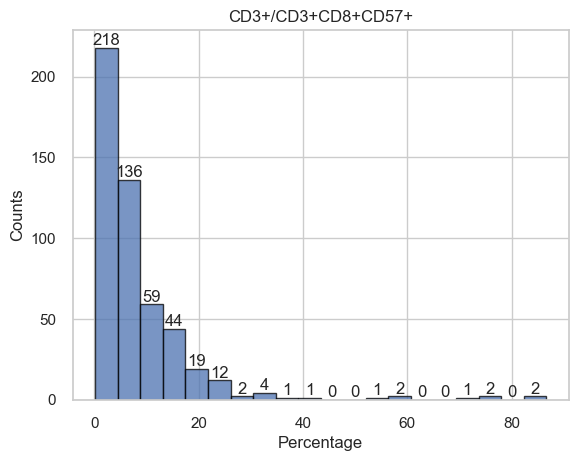

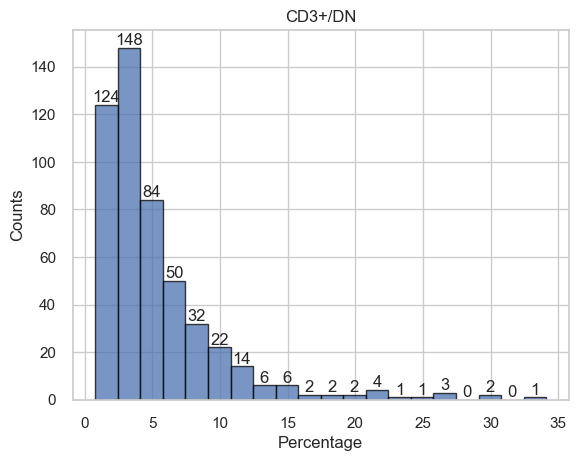

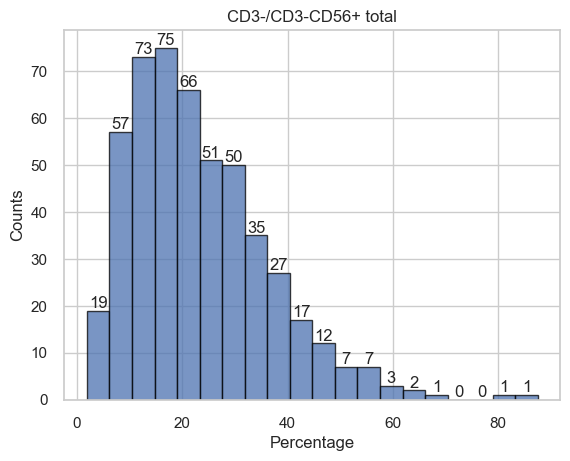

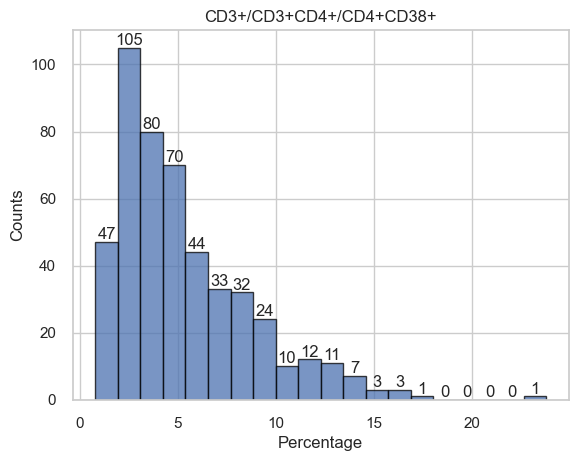

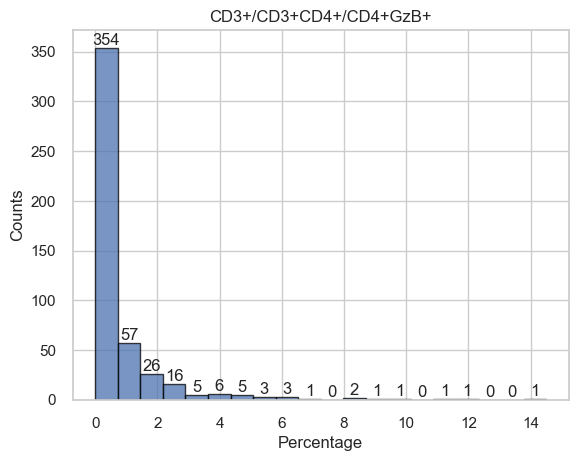

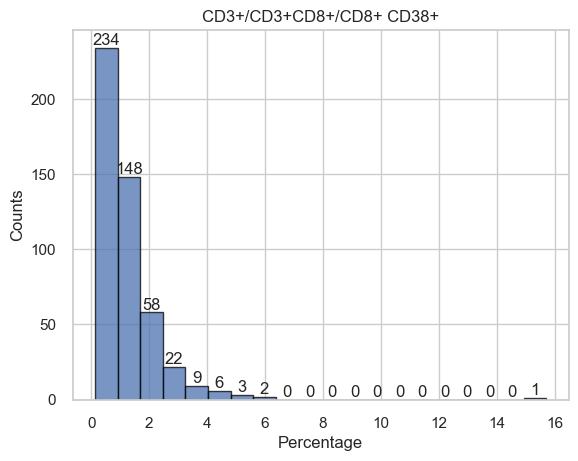

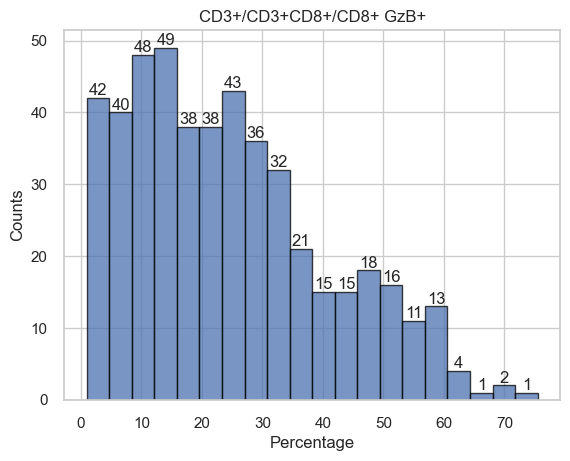

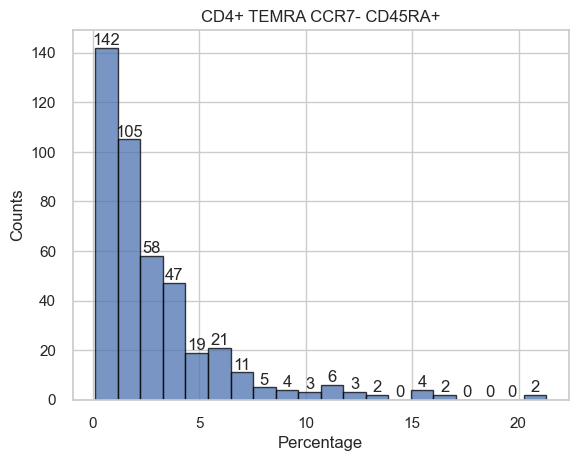

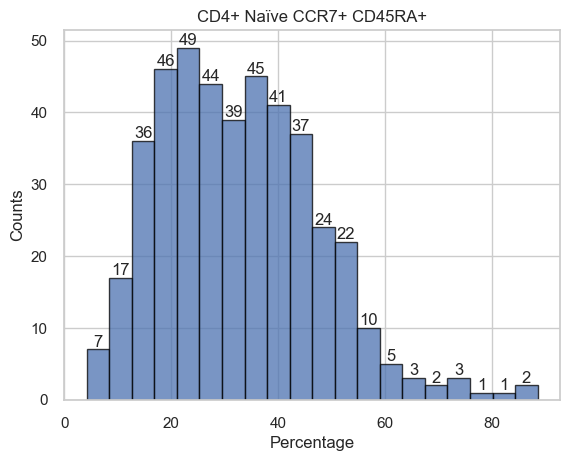

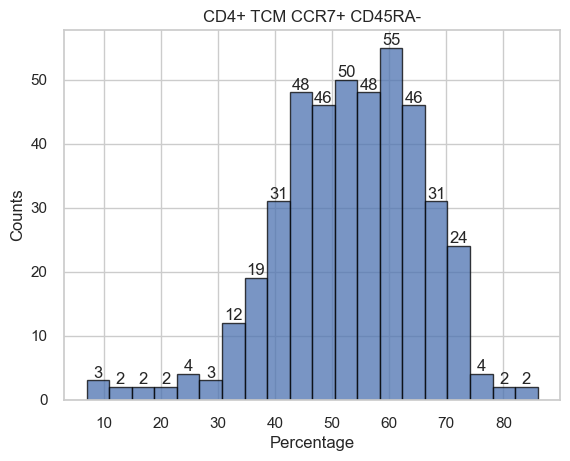

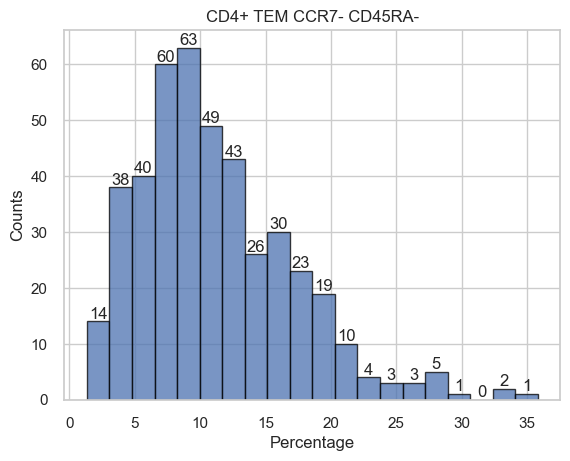

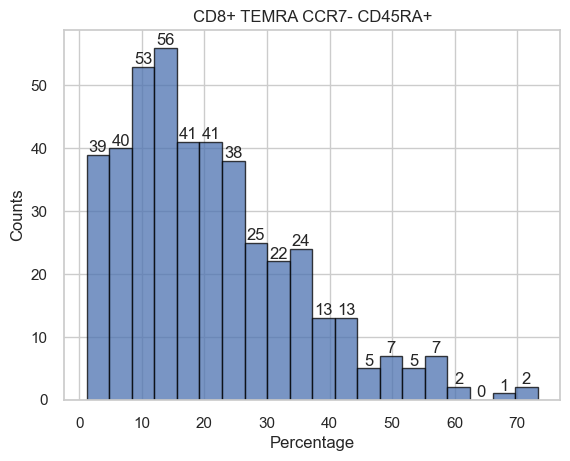

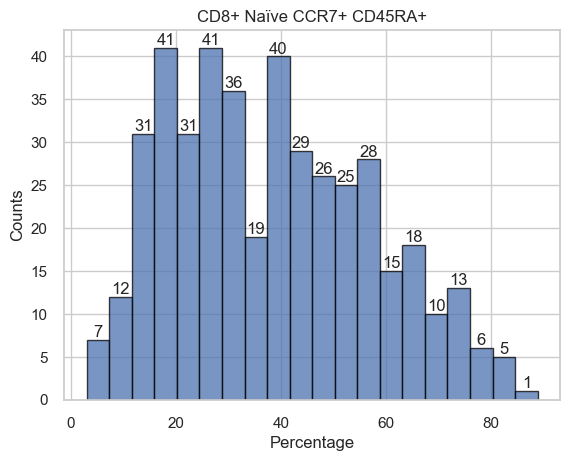

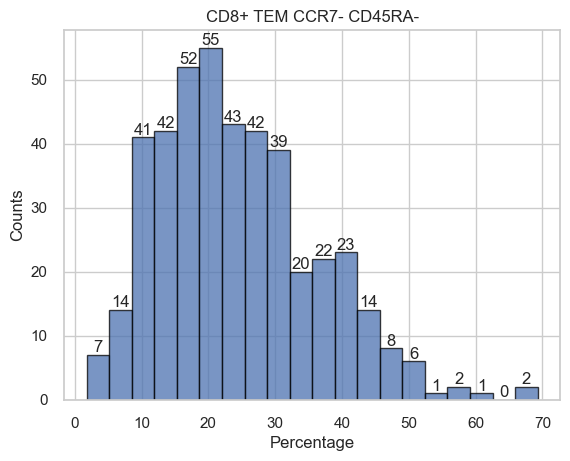

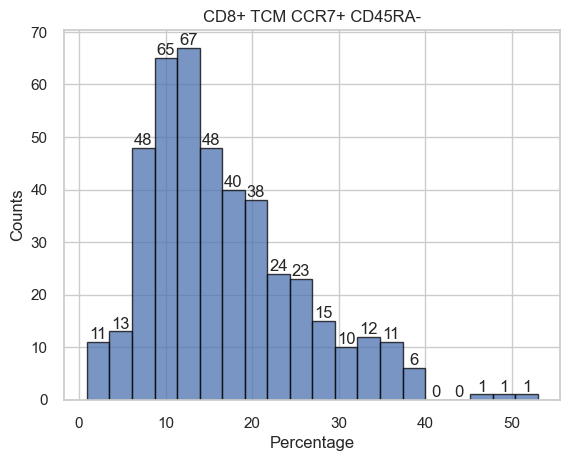

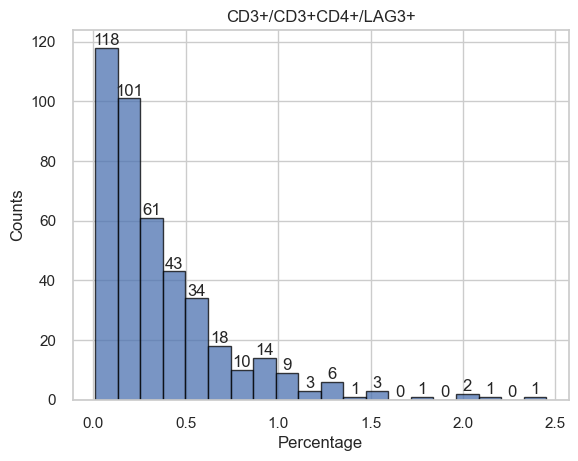

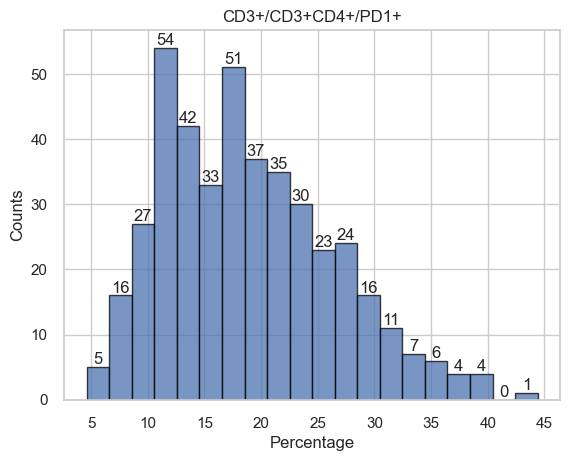

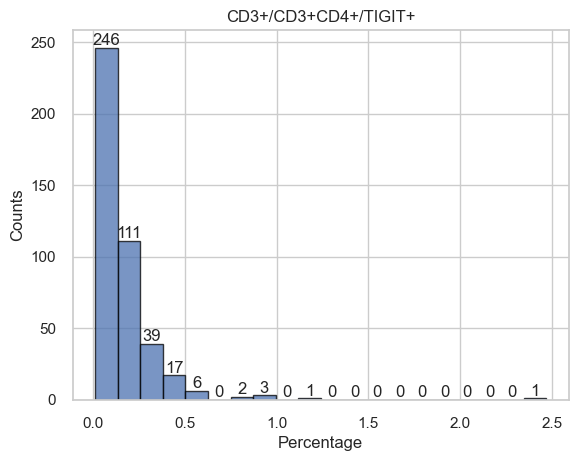

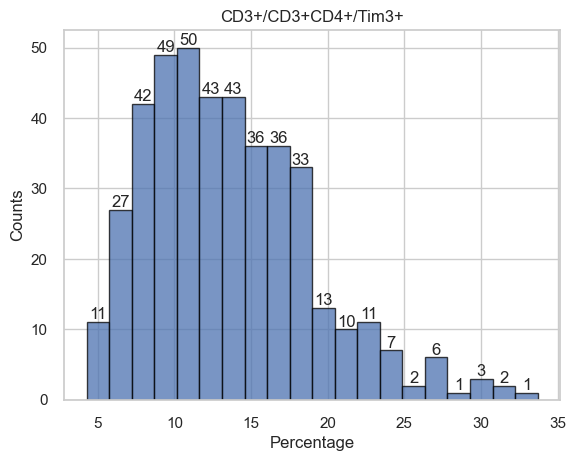

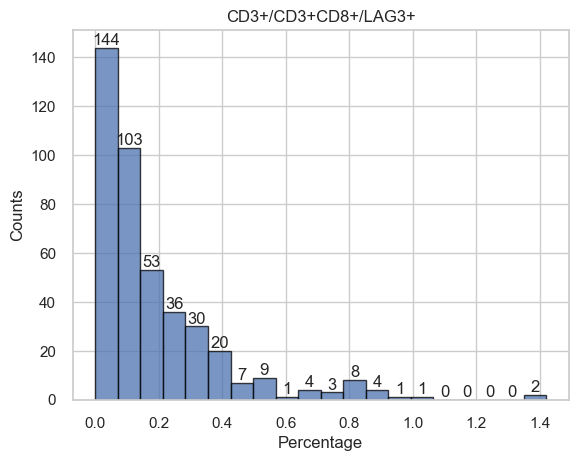

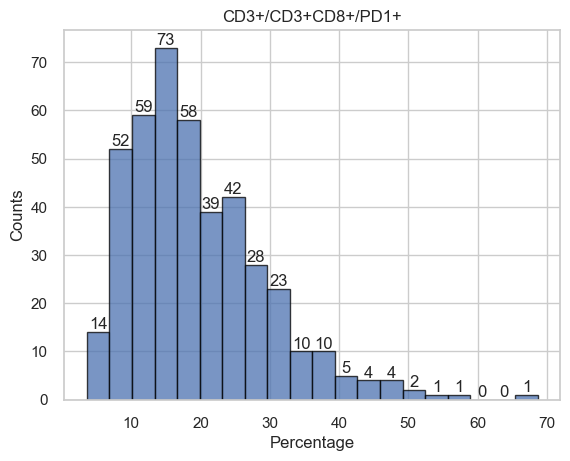

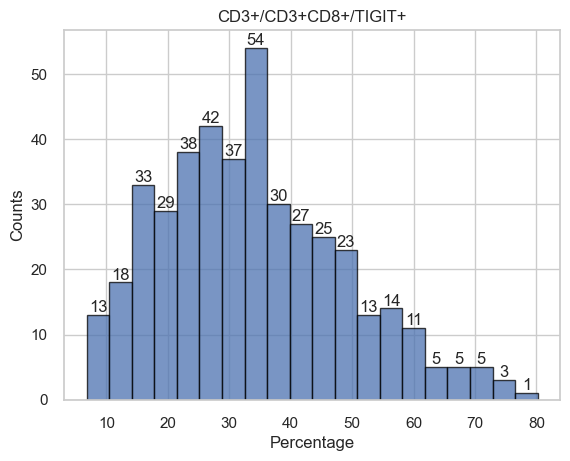

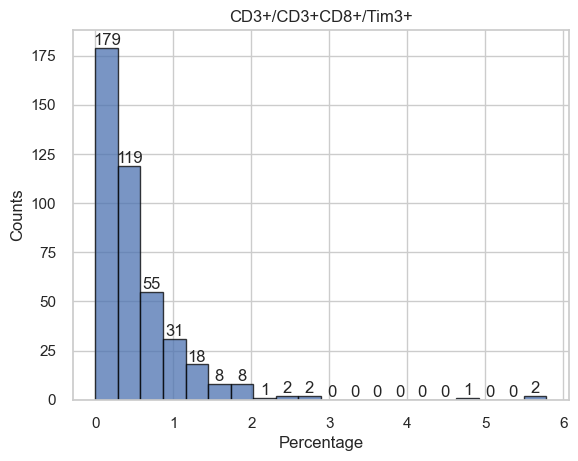

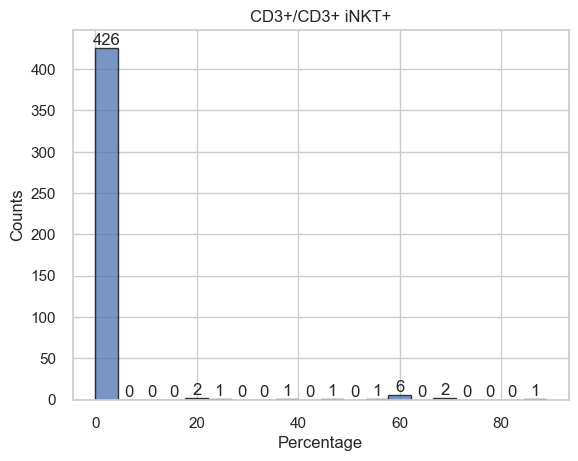

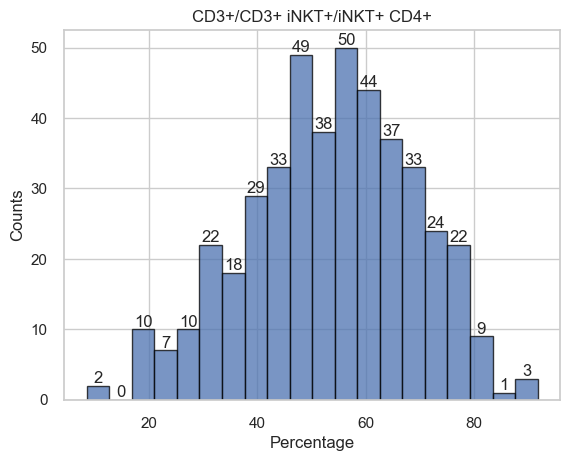

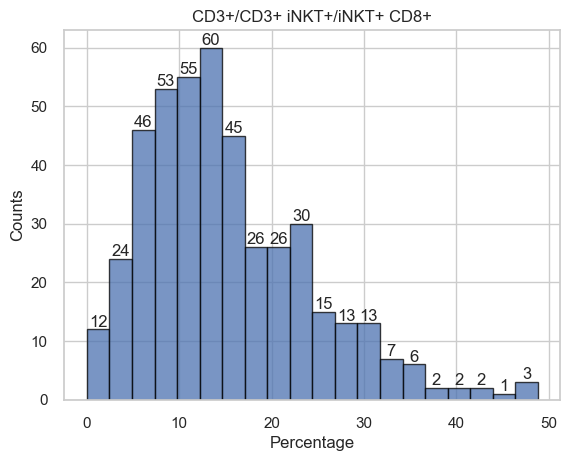

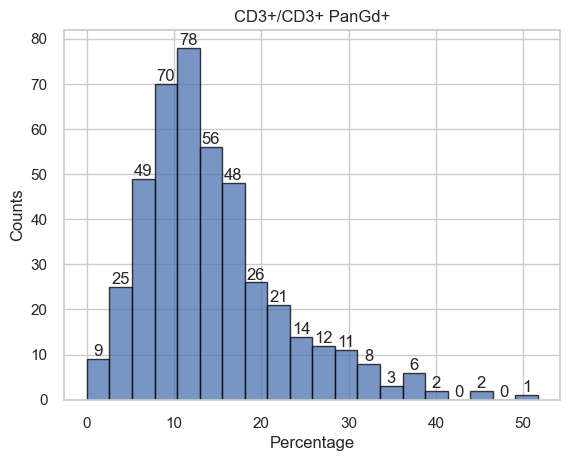

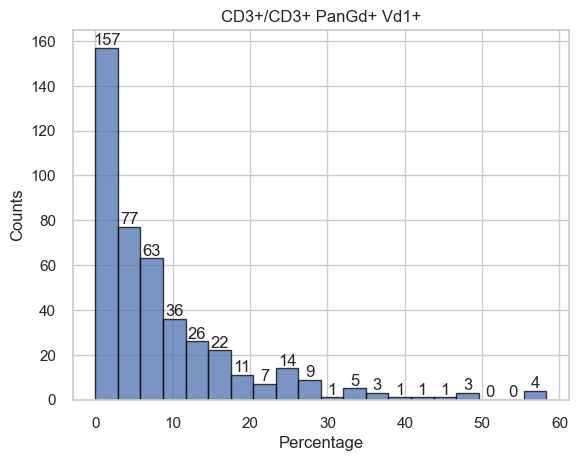

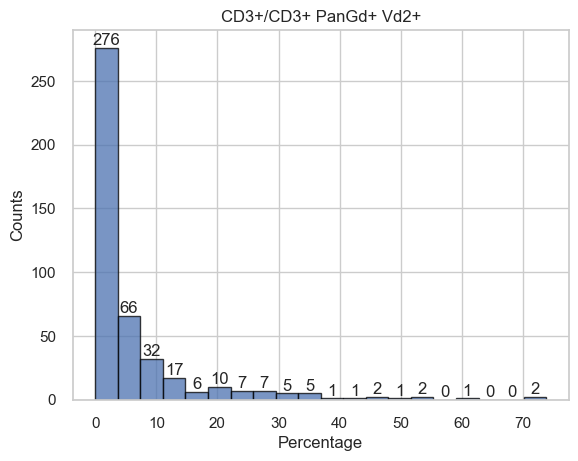

In [6]:
get_phe('CD3+/CD3+CD8+CD57+', df1, 'CD3+CD57+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD57+/CD3+CD57+_hist")
get_phe('CD3+/DN', df1, 'CD3+DN', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+DN/CD3+DN_hist")
get_phe('CD3-/CD3-CD56+ total', df1, 'CD3-CD56+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3-CD56+/CD3-CD56+_hist")
get_phe('CD3+/CD3+CD4+/CD4+CD38+', df2, 'CD3+CD4+CD38+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CD38+/CD3+CD4+CD38+_hist")
get_phe('CD3+/CD3+CD4+/CD4+GzB+', df2, 'CD3+CD4+GzB+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+GzB+/CD3+CD4+GzB+_hist")
get_phe('CD3+/CD3+CD8+/CD8+ CD38+', df2, 'CD3+CD8+CD38+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD38+/CD3+CD8+CD38+_hist")
get_phe('CD3+/CD3+CD8+/CD8+ GzB+', df2, 'CD3+CD8+GzB+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+GzB+/CD3+CD8+GzB+_hist")
get_phe('CD4+ TEMRA CCR7- CD45RA+', df3, 'CD3+CD4+CCR7-CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7-CD45RA+/CD3+CD4+CCR7-CD45RA+_hist")
get_phe('CD4+ Naïve CCR7+ CD45RA+', df3, 'CD3+CD4+CCR7+CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7+CD45RA+/CD3+CD4+CCR7+CD45RA+_hist")
get_phe('CD4+ TCM CCR7+ CD45RA-', df3, 'CD3+CD4+CCR7+CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7+CD45RA-/CD3+CD4+CCR7+CD45RA-_hist")
get_phe('CD4+ TEM CCR7- CD45RA-', df3, 'CD3+CD4+CCR7-CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7-CD45RA-/CD3+CD4+CCR7-CD45RA-_hist")
get_phe('CD8+ TEMRA CCR7- CD45RA+', df3, 'CD3+CD8+CCR7-CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7-CD45RA+/CD3+CD8+CCR7-CD45RA+_hist")
get_phe('CD8+ Naïve CCR7+ CD45RA+', df3, 'CD3+CD8+CCR7+CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7+CD45RA+/CD3+CD8+CCR7+CD45RA+_hist")
get_phe('CD8+ TEM CCR7- CD45RA-', df3, 'CD3+CD8+CCR7-CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7-CD45RA-/CD3+CD8+CCR7-CD45RA-_hist")
get_phe('CD8+ TCM CCR7+ CD45RA-', df3, 'CD3+CD8+CCR7+CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7+CD45RA-/CD3+CD8+CCR7+CD45RA-_hist")
get_phe('CD3+/CD3+CD4+/LAG3+', df4, 'CD3+CD4+LAG3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+LAG3+/CD3+CD4+LAG3+_hist")
get_phe('CD3+/CD3+CD4+/PD1+', df4, 'CD3+CD4+PD1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+PD1+/CD3+CD4+PD1+_hist")
get_phe('CD3+/CD3+CD4+/TIGIT+', df4, 'CD3+CD4+TIGIT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+TIGIT+/CD3+CD4+TIGIT+_hist")
get_phe('CD3+/CD3+CD4+/Tim3+', df4, 'CD3+CD4+Tim3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+Tim3+/CD3+CD4+Tim3+_hist")
get_phe('CD3+/CD3+CD8+/LAG3+', df4, 'CD3+CD8+LAG3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+LAG3+/CD3+CD8+LAG3+_hist")
get_phe('CD3+/CD3+CD8+/PD1+', df4, 'CD3+CD8+PD1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+PD1+/CD3+CD8+PD1+_hist")
get_phe('CD3+/CD3+CD8+/TIGIT+', df4, 'CD3+CD8+TIGIT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+TIGIT+/CD3+CD8+TIGIT+_hist")
get_phe('CD3+/CD3+CD8+/Tim3+', df4, 'CD3+CD8+Tim3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+Tim3+/CD3+CD8+Tim3+_hist")
get_phe('CD3+/CD3+ iNKT+', df5, 'CD3+iNKT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+/CD3+iNKT+_hist")
get_phe('CD3+/CD3+ iNKT+/iNKT+ CD4+', df5, 'CD3+iNKT+CD4+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+CD4+/CD3+iNKT+CD4+_hist")
get_phe('CD3+/CD3+ iNKT+/iNKT+ CD8+', df5, 'CD3+iNKT+CD8+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+CD8+/CD3+iNKT+CD8+_hist")
get_phe('CD3+/CD3+ PanGd+', df5, 'CD3+PanGd+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+/CD3+PanGd+_hist")
get_phe('CD3+/CD3+ PanGd+ Vd1+', df5, 'CD3+PanGd+Vd1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+Vd1+/CD3+PanGd+Vd1+_hist")
get_phe('CD3+/CD3+ PanGd+ Vd2+', df5, 'CD3+PanGd+Vd2+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+Vd2+/CD3+PanGd+Vd2+_hist")

In [79]:
# df.to_csv('facs/Baseline/merged.csv', sep = ',', index = False)
# df.columns

# df.to_csv('res.txt', 
#           columns = ['Patient ID', 'IID', 'gender', 'age'] + ['pca' + str(i) for i in range(1,11)], 
#           sep = ' ', index = False, header = False, float_format='%.6f')

# df['CD3+'] = df['CD3+']/100
# df.to_csv('facs/Baseline/CD3.txt', columns = ['Patient ID', 'IID', 'CD3+'], 
#           sep = ' ', index = False, header = False, float_format='%.4f')

Index(['Patient ID', 'gender', 'age', 'ID', 'pca1', 'pca2', 'pca3', 'pca4',
       'pca5', 'pca6',
       ...
       'CD3+/CD3+ iNKT+/iNKT+ CD8+_panel5', 'CD3+/CD3+ PanGd+_panel5',
       'CD3+/CD3+ PanGd+ Vd1+_panel5', 'CD3+/CD3+ PanGd+ Vd2+_panel5', 'IID',
       'CD3+', 'CD3+_CD4+', 'CD3+_CD8+', 'CD3+_CD8+_CD161++',
       'CD3+_CD8+_CD161+Va7.2+'],
      dtype='object', length=125)

In [33]:
gwas = []
for line in open("boson_vcf/res.assoc.linear"): 
    lst = line.split('\n')[0].strip().split(' ')
    lstnew = [i for i in lst if i != '']
    gwas.append(lstnew)
gwas = pd.DataFrame(gwas, columns=['chr', 'ID', 'pos', 'alt', 'add', 'sample_size', 'beta', 'SE', 'p'])
gwas.head()

,chr,ID,pos,alt,add,sample_size,beta,SE,p
0,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
1,1,rs185127847,710225,A,ADD,314,0.05074,2.096,0.03688
2,1,rs185127847,710225,A,COV1,314,-0.01496,-1.009,0.3138
3,1,rs185127847,710225,A,COV2,314,-0.001042,-1.415,0.158
4,1,rs185127847,710225,A,COV3,314,-0.2435,-1.547,0.123


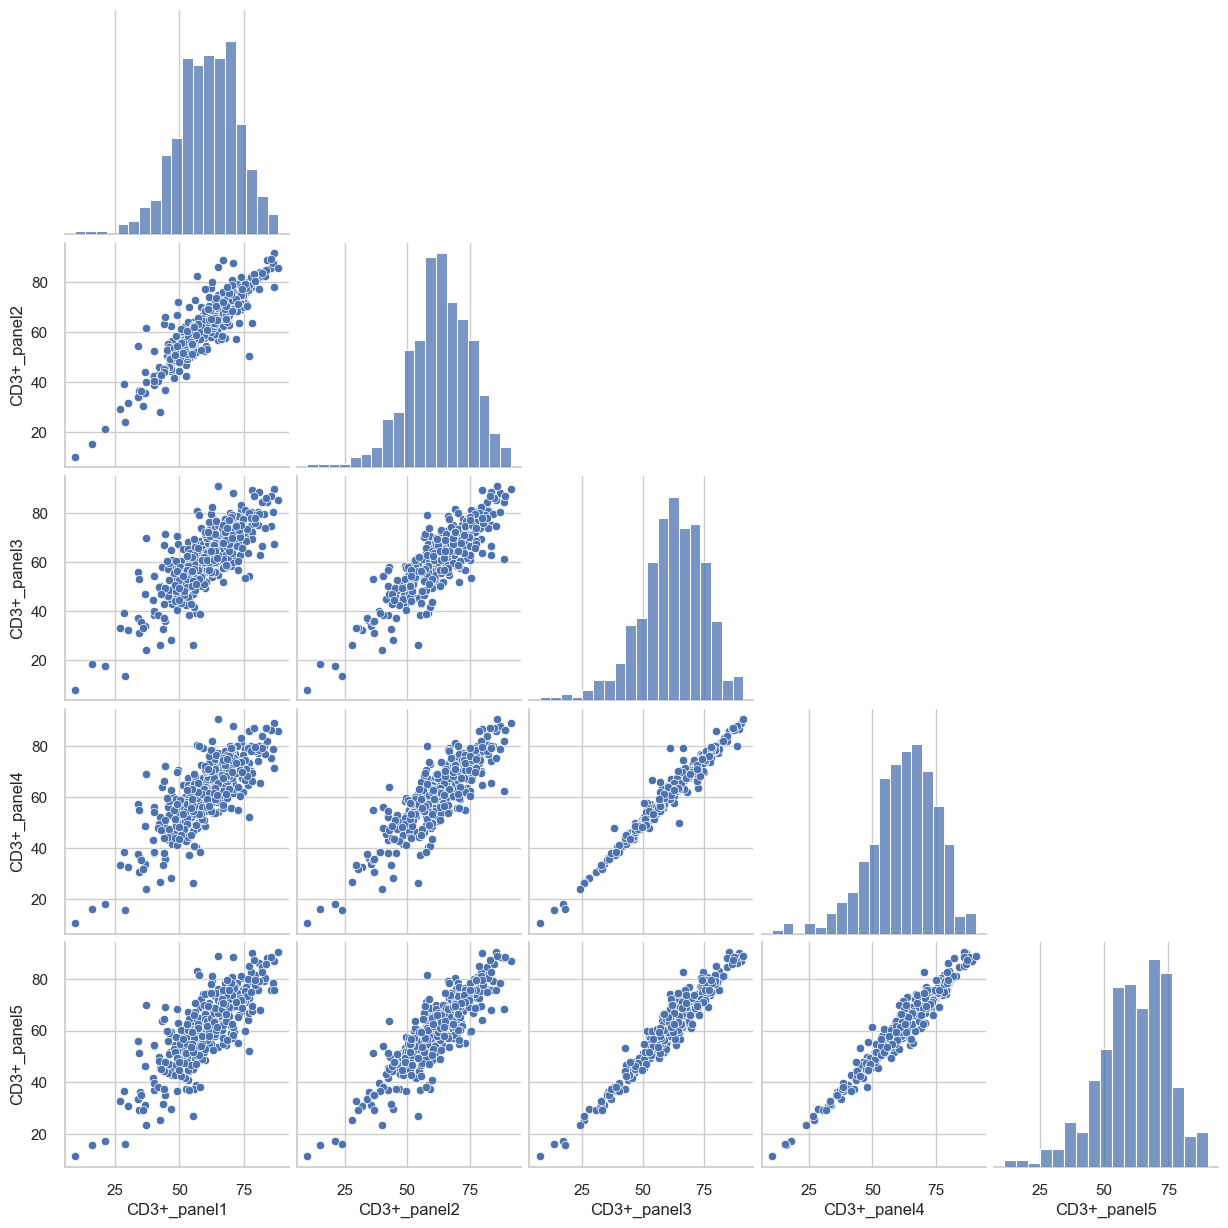

In [50]:
sns.pairplot(df[['CD3+_panel' + str(i+1) for i in range(5)]], kind = 'scatter', corner = True)
plt.savefig('boson_vcf/graphs/CD3+_pairwise.png', dpi = 300, bbox_inches = 'tight')

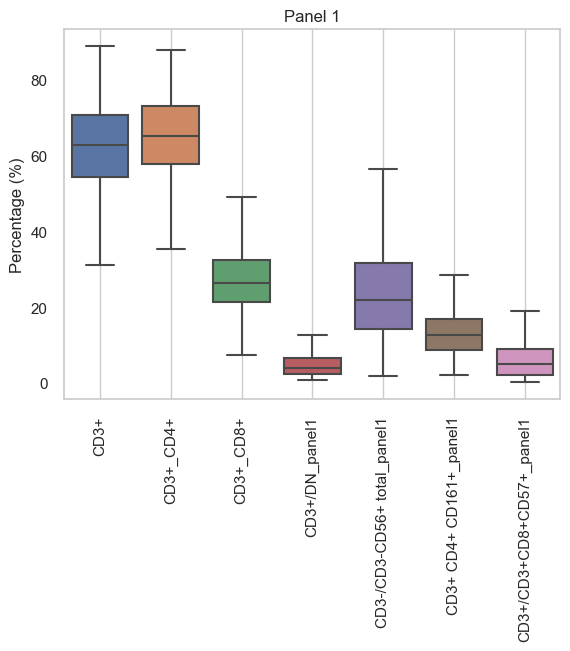

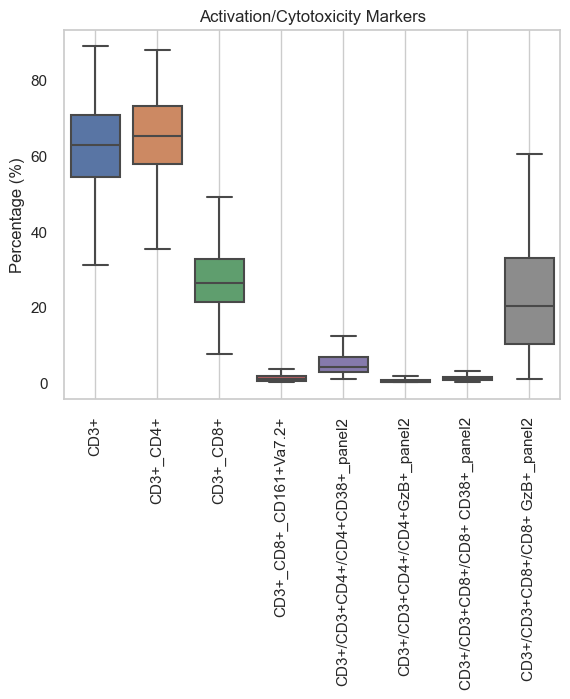

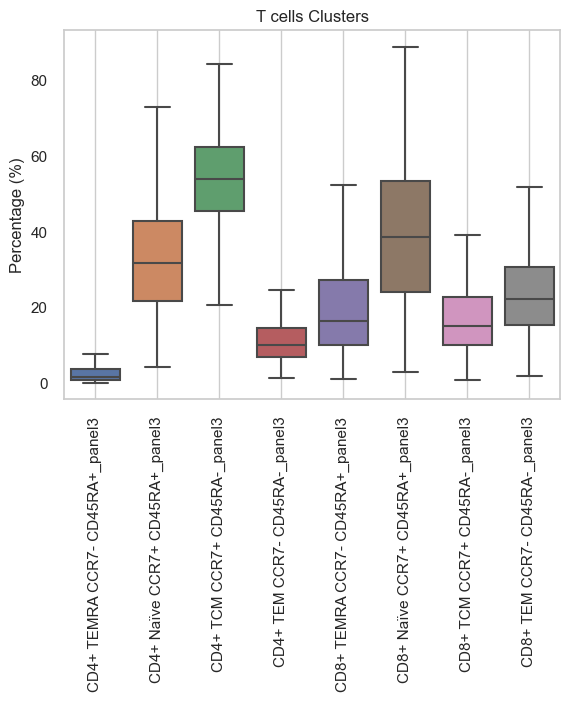

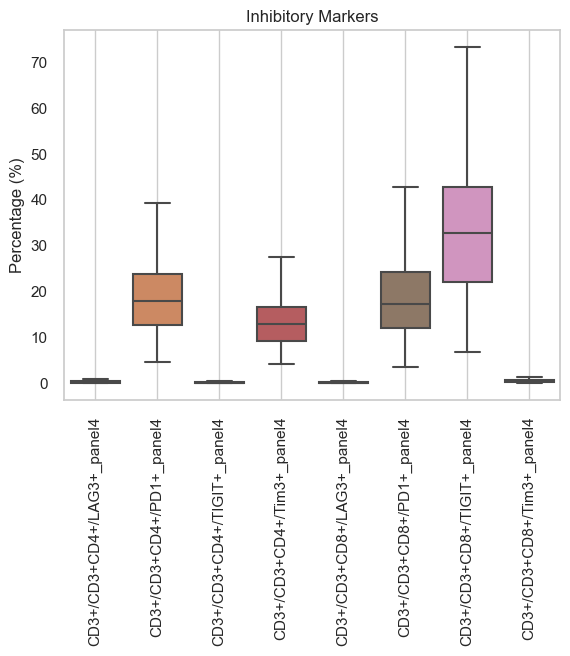

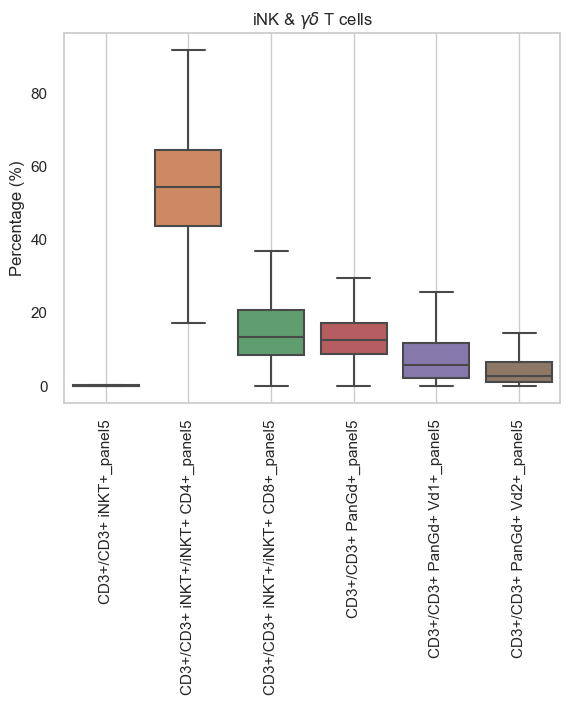

In [59]:
fs.plot_box_distribution(df[['CD3+', 'CD3+_CD4+', 'CD3+_CD8+', 'CD3+/DN_panel1', 'CD3-/CD3-CD56+ total_panel1', 
                         'CD3+ CD4+ CD161+_panel1', 'CD3+/CD3+CD8+CD57+_panel1']], 'Panel 1')
fs.plot_box_distribution(df[['CD3+', 'CD3+_CD4+', 'CD3+_CD8+', 'CD3+_CD8+_CD161+Va7.2+',
                         'CD3+/CD3+CD4+/CD4+CD38+_panel2', 'CD3+/CD3+CD4+/CD4+GzB+_panel2', 'CD3+/CD3+CD8+/CD8+ CD38+_panel2',
                         'CD3+/CD3+CD8+/CD8+ GzB+_panel2']], 'Activation/Cytotoxicity Markers')
fs.plot_box_distribution(df[['CD4+ TEMRA CCR7- CD45RA+_panel3','CD4+ Naïve CCR7+ CD45RA+_panel3',
                          'CD4+ TCM CCR7+ CD45RA-_panel3','CD4+ TEM CCR7- CD45RA-_panel3',
                          'CD8+ TEMRA CCR7- CD45RA+_panel3','CD8+ Naïve CCR7+ CD45RA+_panel3',
                          'CD8+ TCM CCR7+ CD45RA-_panel3','CD8+ TEM CCR7- CD45RA-_panel3']], 'T cells Clusters')
fs.plot_box_distribution(df[[ 'CD3+/CD3+CD4+/LAG3+_panel4', 'CD3+/CD3+CD4+/PD1+_panel4',
                          'CD3+/CD3+CD4+/TIGIT+_panel4', 'CD3+/CD3+CD4+/Tim3+_panel4',
                          'CD3+/CD3+CD8+/LAG3+_panel4', 'CD3+/CD3+CD8+/PD1+_panel4',
                          'CD3+/CD3+CD8+/TIGIT+_panel4', 'CD3+/CD3+CD8+/Tim3+_panel4']], 'Inhibitory Markers')
fs.plot_box_distribution(df[['CD3+/CD3+ iNKT+_panel5',
                          'CD3+/CD3+ iNKT+/iNKT+ CD4+_panel5',
                          'CD3+/CD3+ iNKT+/iNKT+ CD8+_panel5',
                          'CD3+/CD3+ PanGd+_panel5',
                          'CD3+/CD3+ PanGd+ Vd1+_panel5',
                          'CD3+/CD3+ PanGd+ Vd2+_panel5']], 'iNK & $\gamma\delta$ T cells')

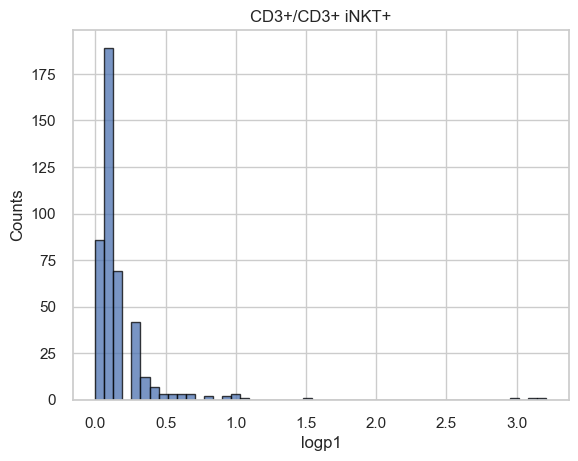

In [5]:
tmp = fs.sanity_check_filter4(df5, 'CD3+/CD3+ iNKT+', plot = False)
tmp['CD3+/CD3+ iNKT+'] = np.log(tmp['CD3+/CD3+ iNKT+'] + 1)
fs.plot_hist(tmp, 'CD3+/CD3+ iNKT+', 'logp1', bins = 50, label = False, 
             save = True, save_path = "boson_vcf/GWAS_logp1_transform/CD3+iNKT+/CD3+iNKT+_transformed")

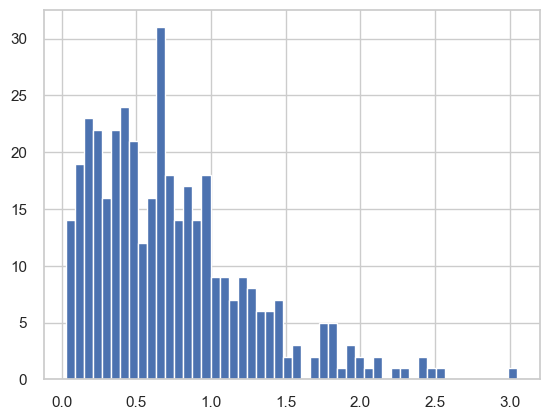

In [11]:


Va72['CD3+CD8+CD161+Va7.2+'] = np.log(Va72['CD3+CD8+CD161+Va7.2+'] + 1)
plt.hist(Va72['CD3+CD8+CD161+Va7.2+'], bins = 50)
plt.show()

(array([  2.,   9.,  27.,  53.,  88., 119., 108.,  67.,  23.,   8.]),
 array([-4.50986001, -3.73461477, -2.95936953, -2.1841243 , -1.40887906,
        -0.63363383,  0.14161141,  0.91685664,  1.69210188,  2.46734712,
         3.24259235]),
 <BarContainer object of 10 artists>)

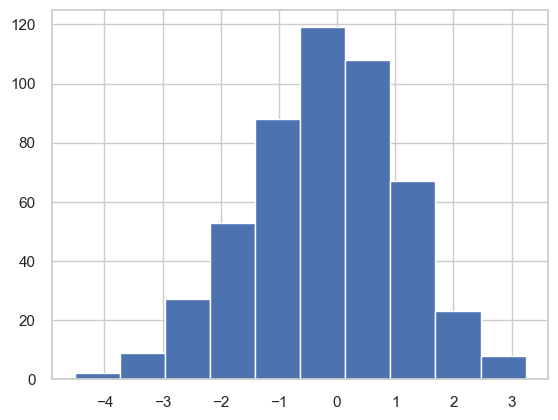

In [16]:
plt.hist(np.log(df1['CD3+/CD3+CD8+/CD8+CD161+Va7.2+_panel1']))